## 签到（囯内）

首先我们解压这个zip文件，可以发现它是一堆嵌套的zip文件，里面塞了很多名称被混淆过的txt。大概长这样：

```
├── 1
│   ├── IIIlllIlIIIlIII
│   │   ├── IIllIlIllIIIlll.txt
│   │   ├── llIIlIllllIlIll.txt
│   │   └── llllllIllIllIII.txt
│   ├── IllIIIIlIIIllII
│   │   ├── lIlIIIIlIlllIIl
│   │   │   ├── IIIIlIllIlllIll.txt
│   │   │   ├── IlIlIlIIlIIIIIl.txt

直接让ChatGPT速通：

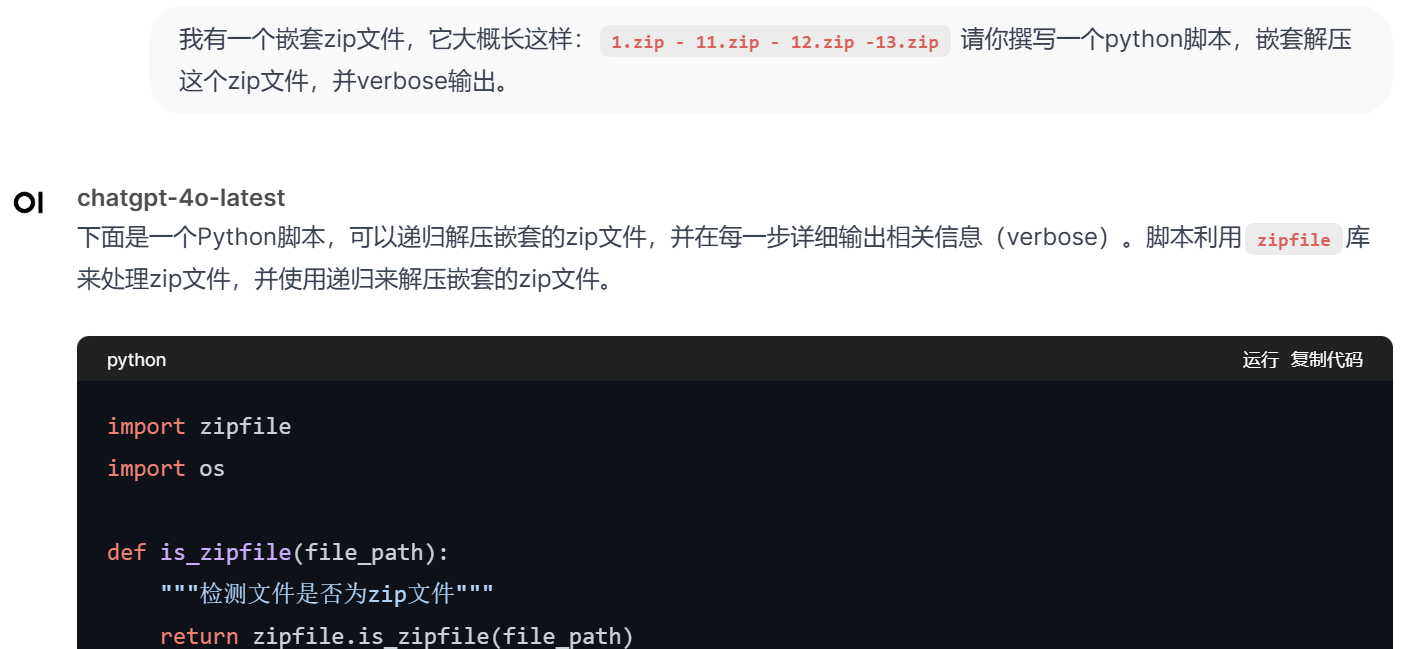

In [1]:
import zipfile
import os

def is_zipfile(file_path):
    """检测文件是否为zip文件"""
    return zipfile.is_zipfile(file_path)

def unzip_file(zip_path, extract_dir):
    """解压单个zip文件"""
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        print(f'解压 {zip_path} 到 {extract_dir}')
        zip_ref.extractall(extract_dir)

def process_zip(zip_path, extract_parent_dir):
    """递归处理zip文件"""
    # 确定当前文件的基础名称（无扩展名）
    base_name = os.path.basename(zip_path).replace('.zip', '')

    # 为当前zip文件创建一个单独的文件夹来存放解压内容
    current_directory = os.path.join(extract_parent_dir, base_name)
    if not os.path.exists(current_directory):
        os.makedirs(current_directory)

    # 解压当前zip文件的内容
    unzip_file(zip_path, current_directory)

    # 遍历解压后的内容
    for root, dirs, files in os.walk(current_directory):
        for file_name in files:
            file_path = os.path.join(root, file_name)

            # 如果解压出来的文件是一个zip文件，递归解压
            if is_zipfile(file_path):
                print(f'找到嵌套的zip文件: {file_path}')
                process_zip(file_path, current_directory)

            # 如果txt文件中包含flag，则输出
            if file_path.endswith(".txt"):
                _str = open(file_path, "rb").read()
                _str = _str.decode('utf-8')
                if 'flag{' in _str:
                    print(_str)
                    
if __name__ == "__main__":
    # 起始的zip文件路径 (请根据实际存放路径修改)
    for input_zip in ["1.zip", "2.zip", "3.zip"]:
    
        # 指定解压目标目录
        extract_dir = os.path.join(os.getcwd(), "extracted")
        if not os.path.exists(extract_dir):
            os.makedirs(extract_dir)
        
        # 递归处理zip文件
        process_zip(input_zip, extract_dir)

解压 1.zip 到 d:\Downloads\geekgame24\tutorial-signin\extracted\1
找到嵌套的zip文件: d:\Downloads\geekgame24\tutorial-signin\extracted\1\IllIIIIlIIIllII.zip
解压 d:\Downloads\geekgame24\tutorial-signin\extracted\1\IllIIIIlIIIllII.zip 到 d:\Downloads\geekgame24\tutorial-signin\extracted\1\IllIIIIlIIIllII
找到嵌套的zip文件: d:\Downloads\geekgame24\tutorial-signin\extracted\1\IllIIIIlIIIllII\lIlIIIIlIlllIIl.zip
解压 d:\Downloads\geekgame24\tutorial-signin\extracted\1\IllIIIIlIIIllII\lIlIIIIlIlllIIl.zip 到 d:\Downloads\geekgame24\tutorial-signin\extracted\1\IllIIIIlIIIllII\lIlIIIIlIlllIIl
找到嵌套的zip文件: d:\Downloads\geekgame24\tutorial-signin\extracted\1\IllIIIIlIIIllII\lIllIIIlIllIIII.zip
解压 d:\Downloads\geekgame24\tutorial-signin\extracted\1\IllIIIIlIIIllII\lIllIIIlIllIIII.zip 到 d:\Downloads\geekgame24\tutorial-signin\extracted\1\IllIIIIlIIIllII\lIllIIIlIllIIII
找到嵌套的zip文件: d:\Downloads\geekgame24\tutorial-signin\extracted\1\IllIIIIlIIIllII\lllllIlIIlllllI.zip
解压 d:\Downloads\geekgame24\tutorial-signin\extracted\1